In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
image = cv2.imread('/home/shawn/OMSCS6476/ps02-master/input_images/test_images/scene_some_signs.png')
output = image.copy()
image1 = image.copy()
image2 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

b,g,r = cv2.split(image)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

In [12]:
kernel = np.ones((5,5), np.float32)/25
gray = cv2.filter2D(gray,-1,kernel)
#image1 = cv2.filter2D(image1, -1, kernel)
#image2 = 

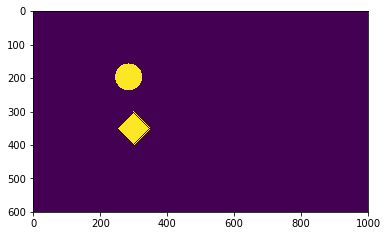

In [13]:
#define the state of the traffic light
#hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(image1, cv2.COLOR_BGR2HSV)
#lower mask
lower_red_on = np.array([0,50,150])
upper_red_on = np.array([10,255,255])
mask_red_on_0 = cv2.inRange(hsv_img, lower_red_on, upper_red_on)
#upper mask
lower_red_on = np.array([170,50,150])
upper_red_on = np.array([180,255,255])
mask_red_on_1 = cv2.inRange(hsv_img, lower_red_on, upper_red_on)
mask_red_on = mask_red_on_1 + mask_red_on_0
mask_red_on = cv2.bitwise_and(image1,image1, mask= mask_red_on)
mask_red_on = cv2.cvtColor(mask_red_on, cv2.COLOR_BGR2GRAY)
# define range of yellow color in HSV
lower_yellow_on = np.array([20,50,150])
upper_yellow_on = np.array([40,255,255])
mask_yellow_on = cv2.inRange(hsv_img, lower_yellow_on, upper_yellow_on)
mask_yellow_on = cv2.bitwise_and(image1,image1, mask= mask_yellow_on)
mask_yellow_on = cv2.cvtColor(mask_yellow_on, cv2.COLOR_BGR2GRAY)

# define range of green color in HSV
lower_green_on = np.array([50,50,150])
upper_green_on = np.array([70,255,255])
mask_green_on = cv2.inRange(hsv_img, lower_green_on, upper_green_on)
mask_green_on = cv2.bitwise_and(image1,image1, mask= mask_green_on)
mask_green_on = cv2.cvtColor(mask_green_on, cv2.COLOR_BGR2GRAY)

#cv2.imwrite('output2.jpg', mask_green)
plt.imshow(mask_yellow_on)
plt.show()

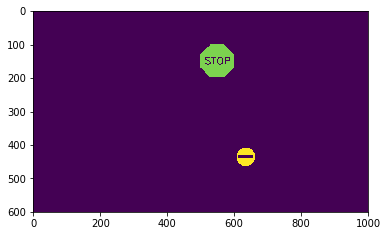

In [14]:
#Traffic light or not
hsv_img = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
#lower mask
lower_red_all = np.array([0,50,50])
upper_red_all = np.array([10,255,255])
mask_red_all_0 = cv2.inRange(hsv_img, lower_red_all, upper_red_all)
#upper mask
lower_red_all = np.array([170,50,50])
upper_red_all = np.array([180,255,255])
mask_red_all_1 = cv2.inRange(hsv_img, lower_red_all, upper_red_all)
mask_red_all = mask_red_all_1 + mask_red_all_0
mask_red_all = cv2.bitwise_and(image1,image1, mask= mask_red_all)
mask_red_all = cv2.cvtColor(mask_red_all, cv2.COLOR_BGR2GRAY)
# define range of yellow color in HSV
lower_yellow_all = np.array([20,50,50])
upper_yellow_all = np.array([40,255,255])
mask_yellow_all = cv2.inRange(hsv_img, lower_yellow_all, upper_yellow_all)
mask_yellow_all = cv2.bitwise_and(image1,image1, mask= mask_yellow_all)
mask_yellow_all = cv2.cvtColor(mask_yellow_all, cv2.COLOR_BGR2GRAY)
# define range of green color in HSV
lower_green_all = np.array([50,50,50])
upper_green_all = np.array([70,255,255])
mask_green_all = cv2.inRange(hsv_img, lower_green_all, upper_green_all)
mask_green_all = cv2.bitwise_and(image1,image1, mask= mask_green_all)
mask_green_all = cv2.cvtColor(mask_green_all, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('output2.jpg', mask_green)
plt.imshow(mask_red_all)
plt.show()

In [15]:
>>> #green = np.uint8([[[0,255,0 ]]])
>>> #hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
>>> #print hsv_green

In [16]:
#target color to HSV
#yellow_color=np.uint8([[[255,255,0]]])
#yellow_color_hsv = cv2.cvtColor(yellow_color, cv2.COLOR_BGR2HSV)
#plt.imshow(yellow_color_hsv)
#plt.show()

In [17]:
# find circles
circles_red_on = cv2.HoughCircles(mask_red_on, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_red_on)
circles_yellow_on = cv2.HoughCircles(mask_yellow_on, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_yellow_on)
circles_green_on = cv2.HoughCircles(mask_green_on, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_green_on)
circles_red_all = cv2.HoughCircles(mask_red_all, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_red_all)
circles_yellow_all = cv2.HoughCircles(mask_yellow_all, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_yellow_all)
circles_green_all = cv2.HoughCircles(mask_green_all, cv2.cv.CV_HOUGH_GRADIENT, 1, 50, param1=30, param2=10,minRadius=3, maxRadius=30)
print(circles_green_all)

[[[ 555.5         147.5           8.86002254]
  [ 635.5         435.5          28.15137672]]]
None
None
[[[ 555.5         147.5           8.86002254]
  [ 635.5         435.5          28.15137672]]]
None
None


In [18]:
#determine if it is a traffic light
center_x = None
center_y = None
center_r = None

if (circles_red_all is not None) & (circles_yellow_all is not None) & (circles_green_all is not None) :
    circles_red = np.round(circles_red_all[0, :]).astype("int")
    circles_yellow = np.round(circles_yellow_all[0, :]).astype("int")
    circles_green = np.round(circles_green_all[0, :]).astype("int")
    for (rd_x, rd_y, rd_r) in circles_red:
        for(yl_x, yl_y, yl_r) in circles_yellow:
            for(gr_x, gr_y, gr_r) in circles_green:
                #if (yl_x - 5 <= rd_x <= yl_x + 5) & (gr_x - 5 <= rd_x <= gr_x + 5) & (gr_y < yl_y < rd_y) & (yl_y-gr_y -5 <=rd_y-yl_y <= yl_y-gr_y+5):
                #if rd_x in (yl_x - 5,yl_x + 5) & rd_x in (gr_x - 5, gr_x + 5) & yl_y in (gr_y, rd_y) & rd_y-yl_y in (yl_y-gr_y -5, yl_y-gr_y+5):
                if ((yl_x - 5 <= rd_x <= yl_x + 5) & (gr_x - 5 <= rd_x <= gr_x + 5) & (gr_y > yl_y > rd_y) & (gr_y - yl_y -10 <= yl_y - rd_y <= gr_y - yl_y + 10)) :
                    center_x = yl_x
                    center_y = yl_y
                    center_r = yl_r

center_x, center_y, center_r

(None, None, None)

In [10]:
#determine tl state
state = None

if circles_red_on is not None:
    circles_red_on = np.round(circles_red_on[0, :]).astype("int")
    for(x, y, r) in circles_red_on:
        if (center_r - 5<= r <= center_r + 5):
            state = 'red'

if circles_green_on is not None:
    circles_green_on = np.round(circles_green_on[0, :]).astype("int")
    for(x, y, r) in circles_green_on:
        if (center_r - 5<= r <= center_r + 5):
            state = 'green'
            
if circles_yellow_on  is not None:
    circles_yellow_on = np.round(circles_yellow_on[0, :]).astype("int")
    for(x, y, r) in circles_yellow_on:
        if (center_r - 5 <= r <= center_r + 5):
            state = 'yellow'

(center_x, center_y),state

((116, 340), 'red')

In [45]:
if state == 'red':
    # convert the (x, y) coordinates and radius of the circles to integers
    #circles_red_on = np.round(circles_red_on[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles_red_on:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        if (center_x - 10 <= x <= center_x + 10  & center_r - 10 <= r <= center_r + 10): 
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

if state == 'yellow':
    # convert the (x, y) coordinates and radius of the circles to integers
    #circles_yellow_on = np.round(circles_yellow_on[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles_yellow_on:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        if (center_x - 10 <= x <= center_x + 10  & center_r - 10 <= r <= center_r + 10): 
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
            
if state == 'green':
    # convert the (x, y) coordinates and radius of the circles to integers
    #circles_green_on = np.round(circles_green_on[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles_green_on:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        if ((center_x - 10 <= x <= center_x + 10)  & (center_r - 10 <= r <= center_r + 10)): 
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)            
    # show the output image
    #cv2.imshow("output", np.hstack([image, output]))
    #cv2.waitKey(0)
    
    



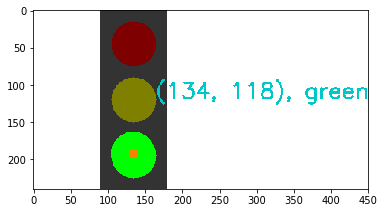

In [48]:
b,g,r = cv2.split(output)       # get b,g,r
output_img = cv2.merge([r,g,b])     # switch it to rgb	
img=np.hstack([rgb_img, output_img])
                         
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (center_x + 30,center_y)
fontScale              = 1
fontColor              = (0,200,200)
lineType               = 2
 
cv2.putText(output_img,('(%s, %s), %s'%(center_x, center_y, state)), 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)

plt.imshow(output_img)
plt.show()